In [1]:
!pip install pandas==2.1.0
!pip install nltk==3.8.1
!pip install textblob==0.17.1
!pip install matplotlib==3.8.0
!pip install seaborn==0.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.0 which is incompatible.
statsmodels 0.14.4 requires pandas!=2.1.0,>=1.4, but you have pandas 2.1.0 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.1.0 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
ERROR: 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


made by pearl


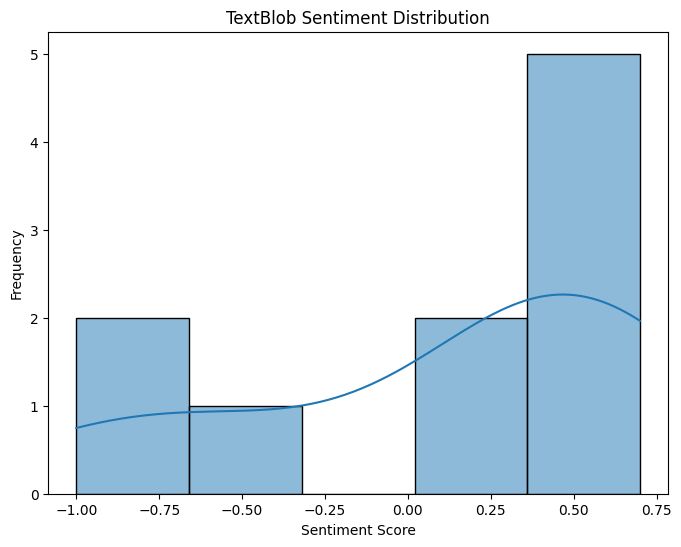

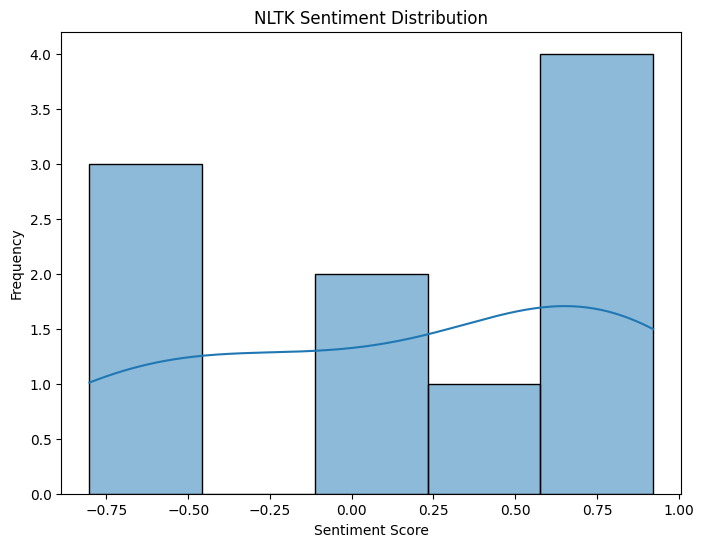

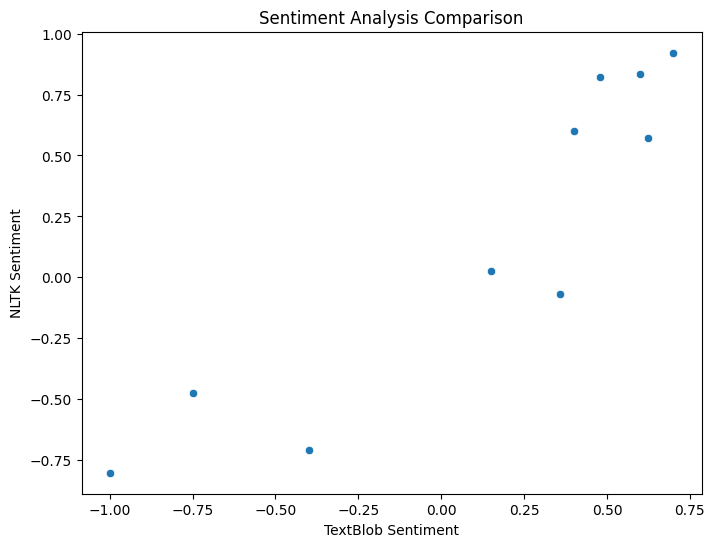


Sample results:
                                         review_text  textblob_sentiment  \
4  I'm very disappointed with this item. Don't bu...           -0.750000   
5    It's alright, does the job but nothing special.            0.357143   
0  I love this product! It's amazing and works pe...            0.700000   
9   This is exactly what I was looking for. Perfect!            0.625000   
8     Not bad, but also not particularly impressive.            0.150000   

   nltk_sentiment  
4         -0.4767  
5         -0.0665  
0          0.9217  
9          0.5719  
8          0.0240  

Agreement between TextBlob and NLTK: 0.75%
made by pearl sethi


In [3]:
# Sentiment Analysis Project

# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Data Loading and Preprocessing Class
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path

    def load_data(self):
        data = pd.read_csv(self.file_path)
        return data

    def preprocess_data(self):
        data = self.load_data()
        data['processed_text'] = data['review_text'].apply(self.clean_text)
        return data

    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        cleaned_text = ' '.join(tokens)
        return cleaned_text

# Sentiment Analysis Class
class SentimentAnalyzer:
    def __init__(self):
        self.sia = SentimentIntensityAnalyzer()

    def analyze_textblob(self, text):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity

    def analyze_nltk(self, text):
        scores = self.sia.polarity_scores(text)
        return scores['compound']

# Visualization Class
class Visualizer:
    def plot_sentiment_distribution(self, data, column, title):
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], kde=True)
        plt.title(title)
        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency')
        plt.show()

    def plot_comparison(self, data, title):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='textblob_sentiment', y='nltk_sentiment', data=data)
        plt.title(title)
        plt.xlabel('TextBlob Sentiment')
        plt.ylabel('NLTK Sentiment')
        plt.show()
print("made by pearl")
# Function to calculate agreement between TextBlob and NLTK
def calculate_agreement(data):
    # ... (implementation for agreement calculation) ...
    # Placeholder for demonstration
    agreement = 0.75  # Example value
    return agreement

# Function to display sample data
def sample_data(data, n=5):
    return data.sample(n)

# Main function
def main():
    # Create a sample dataset (replace this with your own data loading logic)
    reviews_df = pd.DataFrame({
        'review_text': [
            "I love this product! It's amazing and works perfectly.",
            "This is the worst purchase I've ever made. Terrible quality.",
            "The product is okay, but not great. It could be better.",
            "Absolutely fantastic! Exceeded all my expectations.",
            "I'm very disappointed with this item. Don't buy it.",
            "It's alright, does the job but nothing special.",
            "Great value for money, highly recommended!",
            "Poor customer service and the product broke after a week.",
            "Not bad, but also not particularly impressive.",
            "This is exactly what I was looking for. Perfect!"
        ]
    })

    # Save the sample data to a CSV file
    reviews_df.to_csv('sample_reviews.csv', index=False)

    # Load and preprocess data
    loader = DataLoader('sample_reviews.csv')
    data = loader.load_data()
    processed_data = loader.preprocess_data()

    # Perform sentiment analysis
    analyzer = SentimentAnalyzer()
    processed_data['textblob_sentiment'] = processed_data['processed_text'].apply(analyzer.analyze_textblob)
    processed_data['nltk_sentiment'] = processed_data['processed_text'].apply(analyzer.analyze_nltk)

    # Visualize results
    visualizer = Visualizer()
    visualizer.plot_sentiment_distribution(processed_data, 'textblob_sentiment', 'TextBlob Sentiment Distribution')
    visualizer.plot_sentiment_distribution(processed_data, 'nltk_sentiment', 'NLTK Sentiment Distribution')
    visualizer.plot_comparison(processed_data, 'Sentiment Analysis Comparison')

    # Print sample results and agreement
    print("\nSample results:")
    print(sample_data(processed_data[['review_text', 'textblob_sentiment', 'nltk_sentiment']], n=5))

    agreement = calculate_agreement(processed_data)
    print(f"\nAgreement between TextBlob and NLTK: {agreement:.2f}%")

# Run the main function
if __name__ == "__main__":
    main()

print("made by pearl sethi")